# Libraries

In [1]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#Libraries for Data Clean Up
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Libraries for Data Visualization
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

#Libraries for Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load DataFrame
df = pd.read_csv('/Users/kiranrangaraj/Desktop/Final-Project/Data/CleanedUp/vehiclesFinal.csv')
df = df.drop('id',axis=1)
df2 = df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,full-size,other,grey,32.590000,-85.480000,35990
1,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,full-size,sedan,grey,32.547500,-85.468200,7500
2,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,4wd,full-size,SUV,blue,32.616807,-85.464149,4900
3,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,32.547500,-85.468200,19500
4,auburn,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,full-size,pickup,red,32.590000,-85.480000,29590


In [3]:
#Define numerical and categorical values
num_cols = ['year','odometer','long','lat']
cat_cols = ['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

## 1. Transform Categorical Column Values into Integer Values

In [4]:
le=preprocessing.LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [5]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,16,2010.0,7,9262,2,6,2,32742.0,0,2,2,1,7,5,32.590000,-85.480000,35990
1,16,2014.0,18,22162,0,3,2,93600.0,0,0,1,1,9,5,32.547500,-85.468200,7500
2,16,2006.0,4,25161,2,5,2,87046.0,0,0,0,1,0,1,32.616807,-85.464149,4900
3,16,2005.0,13,13203,0,6,0,116000.0,1,0,0,1,8,1,32.547500,-85.468200,19500
4,16,2016.0,40,23053,2,5,2,33290.0,0,2,0,1,8,8,32.590000,-85.480000,29590


## 2. Scale the Data Set

In [6]:
#Scale the numerical data
norm = StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#Scaling target variable
q1,q3 = (df['price'].quantile([0.25,0.75]))
o1 = q1-1.5*(q3-q1)
o2 = q3+1.5*(q3-q1)
df = df[(df.price >= o1) & (df.price <= o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

In [7]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,-1.501228,-0.318297,7,-0.741612,2,6,2,-1.055985,0,2,2,1,7,5,-1.014982,0.479917,10.490996
1,-1.501228,0.416106,18,1.152352,0,3,2,-0.036820,0,0,1,1,9,5,-1.022212,0.480581,8.922658
2,-1.501228,-1.052700,4,1.592662,2,5,2,-0.146578,0,0,0,1,0,1,-1.010423,0.480809,8.496990
3,-1.501228,-1.236301,13,-0.162998,0,6,0,0.338304,1,0,0,1,8,1,-1.022212,0.480581,9.878170
4,-1.501228,0.783308,40,1.283168,2,5,2,-1.046808,0,2,0,1,8,8,-1.014982,0.479917,10.295192


In [8]:
#Function to split data set into training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y = y[0]
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.9,test_size = 0.1,random_state = 0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test = trainingData(df,list(range(len(list(df.columns))-1)))

In [9]:
#Some models will predict neg values so this function will remove those values
def remove_neg(y_test,y_pred):
    ind = [index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred = y_pred[ind]
    y_test = y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#Function for evaluation of model
def result(y_test,y_pred):
    r = []
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#DataFrame that stores the performance of each model
accu = pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

## 3. Model Implementation
* ### a. Linear Regression
* ### b. Ridge Regression
* ### c. Lasso Regression
* ### d. K-Neighbors Regressor
* ### e. Random Forest Regressor
* ### f. Bagging Regressor
* ### g. Adaboost Regressor
* ### h. XGBoost

## 3a. Linear Regression

In [10]:
#Best fit model
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [11]:
#Calculate error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr = result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression'] = r1_lr

Coefficients: 
 [-7.32511382e-04  4.57017529e-01  6.67079134e-05 -1.26554472e-03
 -3.07031564e-02  2.19067996e-01 -2.23441610e-01 -2.35857365e-01
 -8.44037359e-02  7.56012824e-02 -7.93089007e-02 -3.21057178e-02
 -3.15295410e-04  3.82796676e-03 -9.31515879e-04 -6.06514627e-02]
MSLE : 0.0027933355283654795
Root MSLE : 0.05285201536711234
R2 Score : 0.6233821607880337 or 62.3382%


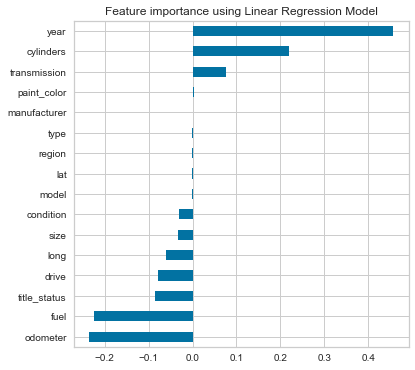

In [12]:
#Plot feature importance graph
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

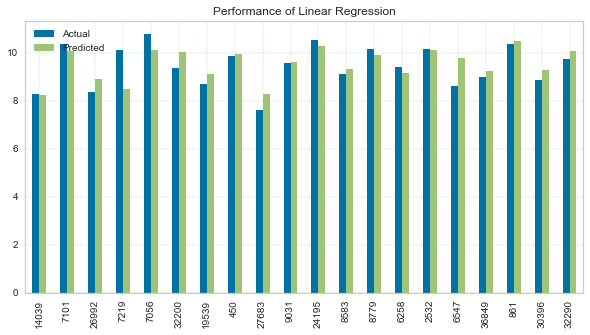

In [13]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize = (10,5))
plt.grid(which ='major', linestyle ='-', linewidth ='0.1', color ='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

## 3b. Ridge regression

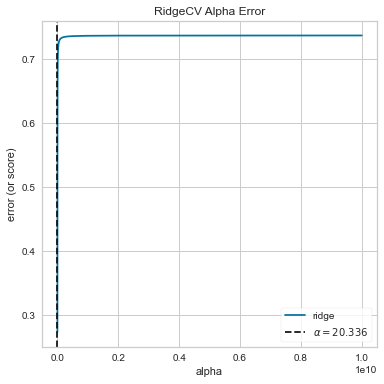

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [14]:
#Predicting alpha value
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas = alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [15]:
#Model object and fit model
RR=Ridge(alpha = 20.336,solver ='auto')
RR.fit(X_train,y_train)
y_pred = RR.predict(X_test)

In [16]:
#Model evaluation
y_test_2,y_pred_2 = remove_neg(y_test,y_pred)
r2_ridge = result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression'] = r2_ridge

MSLE : 0.0027933297973193496
Root MSLE : 0.05285196114922652
R2 Score : 0.6233828866566002 or 62.3383%


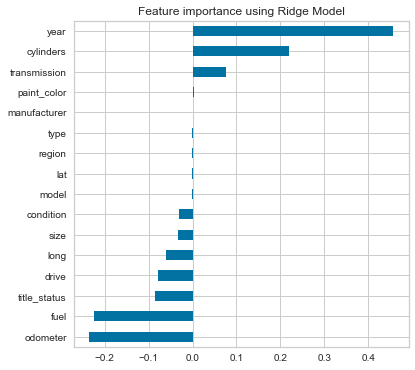

In [17]:
#Feature Importance graph
coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

## 3c. Lasso Regression

In [18]:
#Model object and fit
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

In [19]:
#Model evaluation
y_test_3,y_pred_3 = remove_neg(y_test,y_pred)
r3_lasso = result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0027933033789061213
Root MSLE : 0.052851711220225604
R2 Score : 0.6233892244987204 or 62.3389%


## 3d. KNN

In [20]:
#Estimate MSLE for k=1-9
R_MSLE = []
for i in range(1,10):
    KNN = KNeighborsRegressor(n_neighbors = i)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    error = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.044212314459956915
K = 2  , Root MSLE = 0.04077354112150343
K = 3  , Root MSLE = 0.03978428364398658
K = 4  , Root MSLE = 0.03954384212488302
K = 5  , Root MSLE = 0.039535732539554766
K = 6  , Root MSLE = 0.039662885414302955
K = 7  , Root MSLE = 0.0398244191491673
K = 8  , Root MSLE = 0.040059621632131656
K = 9  , Root MSLE = 0.04024249547909678


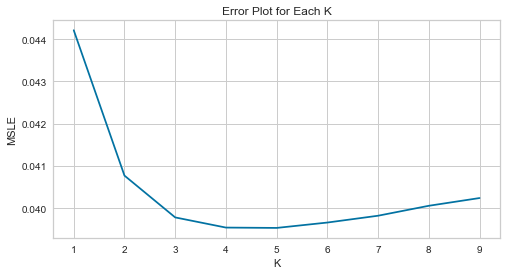

In [21]:
#Plotting error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [22]:
#Model implementation
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [23]:
#Model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0015630741474392097
Root MSLE : 0.039535732539554766
R2 Score : 0.7971499679806296 or 79.715%


In [24]:
accu.to_csv('errors.csv')

## 3e. Random Forest

In [25]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [26]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.0008560525651302193
Root MSLE : 0.02925837598244679
R2 Score : 0.8928021468365606 or 89.2802%


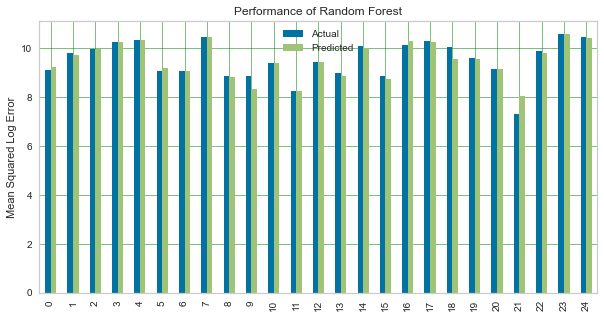

In [27]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

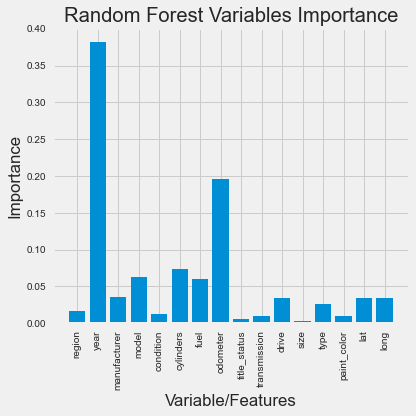

In [28]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# List of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

## 3f. Bagging Regressor

In [29]:
#Model implementation
baggReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [30]:
#Model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.001570992213955056
Root MSLE : 0.039635744145342544
R2 Score : 0.7989741545596318 or 79.8974%


In [31]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

## 3g. Adaboost

In [32]:
#Model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [33]:
#Model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0009096280175262506
Root MSLE : 0.03016004007832633
R2 Score : 0.884201828431372 or 88.4202%


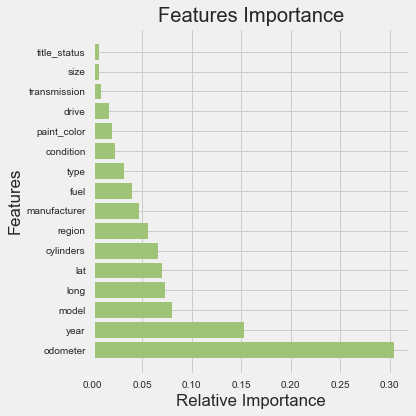

In [34]:
importances = ABR.feature_importances_
features = X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [35]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

## 3h. XGBOOST

In [36]:
#Model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [37]:
#Model evaluation
y_test_1,y_pred_1 = remove_neg(y_test,y_pred)
r8_xg = result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0007347637173563671
Root MSLE : 0.027106525364870487
R2 Score : 0.9077122907579664 or 90.7712%


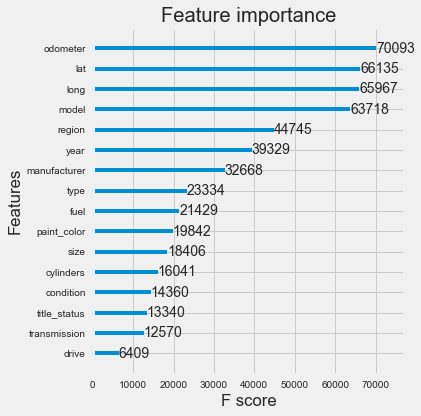

In [38]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [39]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

# Overall Result

In [40]:
accu = pd.read_csv('/Users/kiranrangaraj/Desktop/Final-Project/Data/CleanedUp/errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.002793,0.002793,0.002793,0.001563,0.000856,0.001571,0.000910,0.000735
Root MSLE,0.052852,0.052852,0.052852,0.039536,0.029258,0.039636,0.030160,0.027107
R2 Score,0.623382,0.623383,0.623389,0.797150,0.892802,0.798974,0.884202,0.907712
Accuracy(%),62.338200,62.338300,62.338900,79.715000,89.280200,79.897400,88.420200,90.771200


In [41]:
model_accuracy=accu.loc['Accuracy(%)']

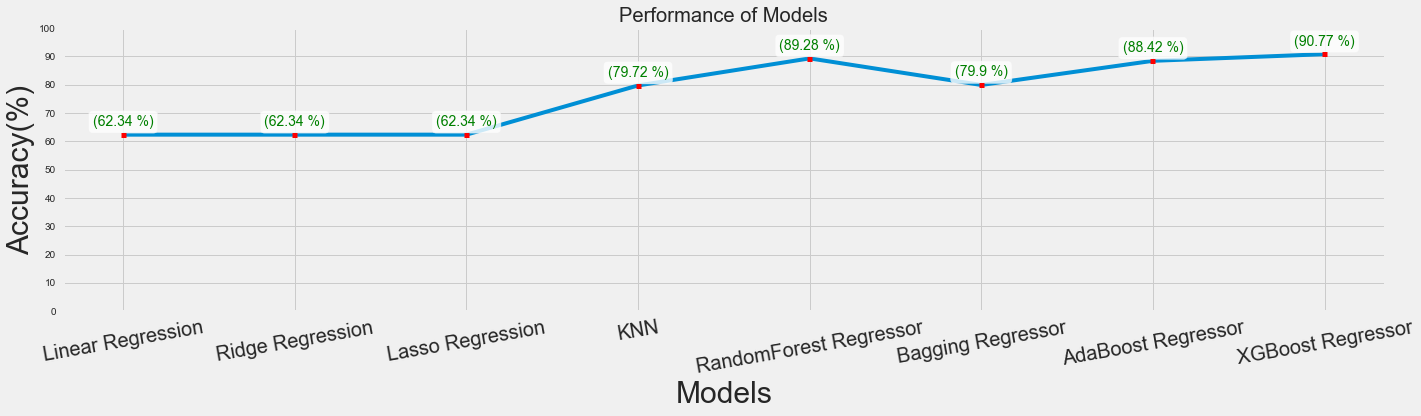

In [42]:
x = list(range(len(model_accuracy)))
y = list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();